In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [3]:
import folium
from folium.plugins import HeatMap

In [4]:
df = pd.read_csv('Family Income and Expenditure.csv')

In [5]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [7]:
df['Region'] = df['Region'].astype('category')
df['Main Source of Income'] = df['Main Source of Income'].astype('category')
df['Household Head Sex'] = df['Household Head Sex'].astype('category')
df['Household Head Highest Grade Completed'] = df['Household Head Highest Grade Completed'].astype('category')
df['Household Head Job or Business Indicator'] = df['Household Head Job or Business Indicator'].astype('category')
df['Household Head Occupation'] = df['Household Head Occupation'].astype('category')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].astype('category')
df['Type of Household'] = df['Type of Household'].astype('category')
df['Type of Building/House'] = df['Type of Building/House'].astype('category')
df['Type of Roof'] = df['Type of Roof'].astype('category')
df['Type of Walls'] = df['Type of Walls'].astype('category')
df['Tenure Status'] = df['Tenure Status'].astype('category')
df['Toilet Facilities'] = df['Toilet Facilities'].astype('category')
df['Main Source of Water Supply'] = df['Main Source of Water Supply'].astype('category')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  category
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  category
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

In [9]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

<h1>1. Distribution of TOTAL HOUSEHOLD INCOME</h1>

df.columns

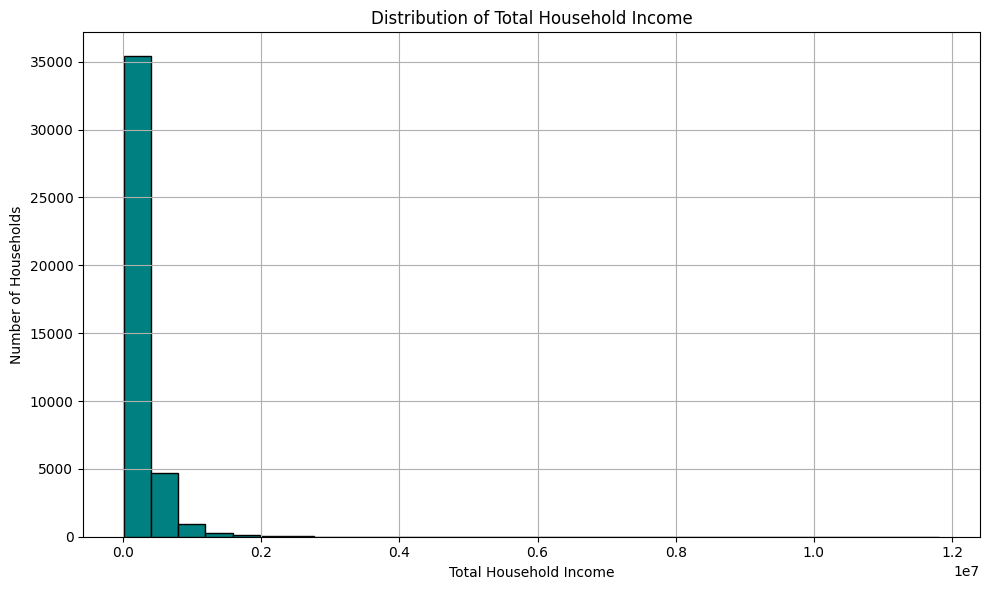

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Household Income'].dropna(), bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Number of Households')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Insight 1 - The chart shows that most households earn low income, while only a few earn very high amounts. This means income is unevenly distributed, with a big gap between rich and poor families.</h1>

<h1>2. AVERAGE FOOD EXPENDITURE per REGION</h1>

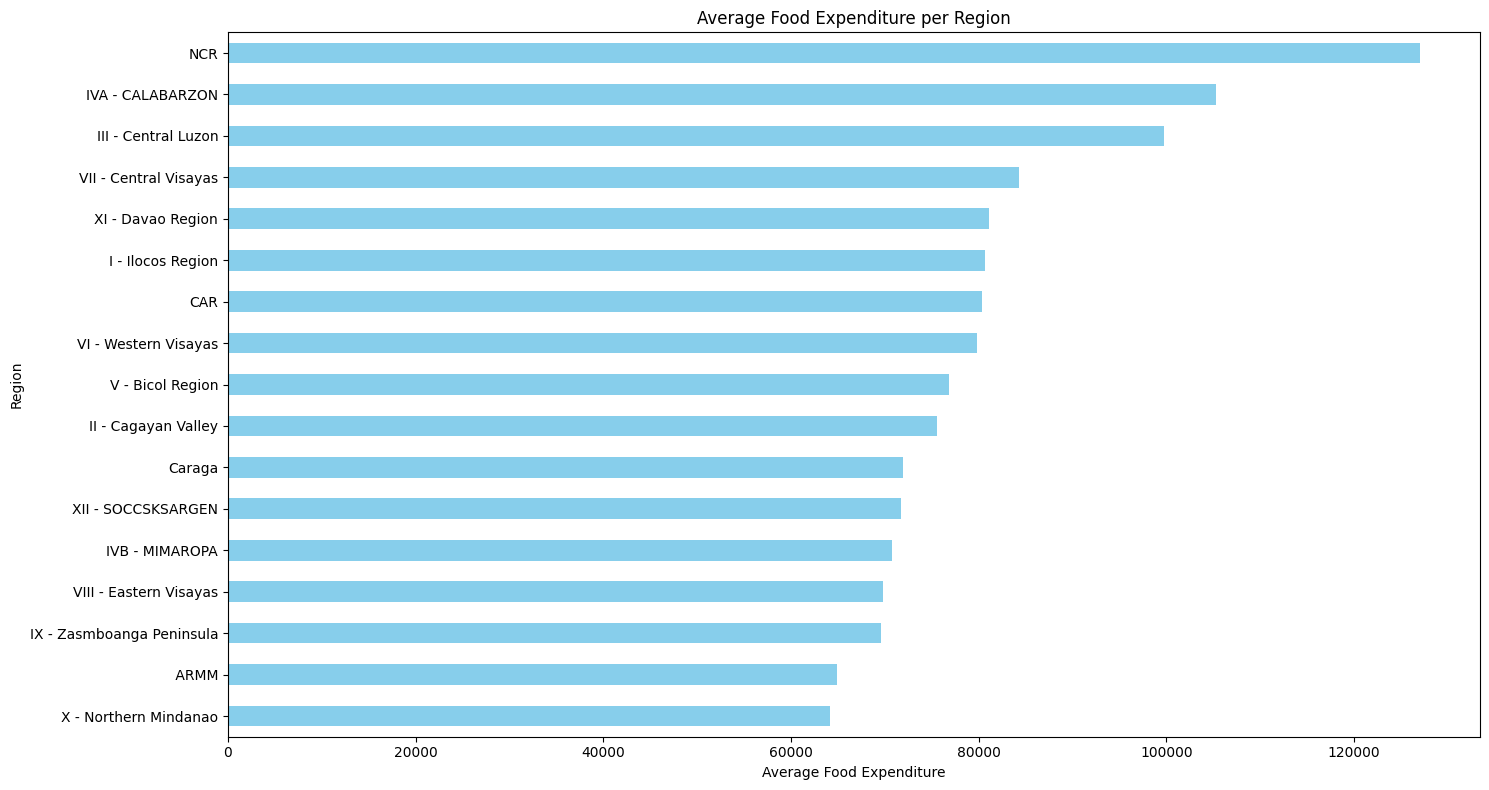

Region
X - Northern Mindanao         64112.585586
 ARMM                         64931.270463
IX - Zasmboanga Peninsula     69645.318233
VIII - Eastern Visayas        69833.928969
IVB - MIMAROPA                70760.293835
XII - SOCCSKSARGEN            71738.088596
Caraga                        71912.659933
II - Cagayan Valley           75604.358269
V - Bicol Region              76811.412217
VI - Western Visayas          79829.025956
CAR                           80352.780290
I - Ilocos Region             80649.937819
XI - Davao Region             81126.927228
VII - Central Visayas         84307.184179
III - Central Luzon           99726.701576
IVA - CALABARZON             105333.949543
NCR                          127080.456659
Name: Total Food Expenditure, dtype: float64

In [11]:
avg_food_by_region = df.groupby('Region')['Total Food Expenditure'].mean().sort_values()

plt.figure(figsize=(15, 8))
avg_food_by_region.plot(kind='barh', color='skyblue')
plt.title('Average Food Expenditure per Region')
plt.xlabel('Average Food Expenditure')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
avg_food_by_region

<h1>Insight 2 -Food spending is very different across regions. NCR spends the most, about twice as much as Northern Mindanao, which spends the least. This likely shows differences in income and cost of living. Knowing this can help create better food support and plans for each region.

</h1>

<h1>3. Main Source of income Categories</h1>

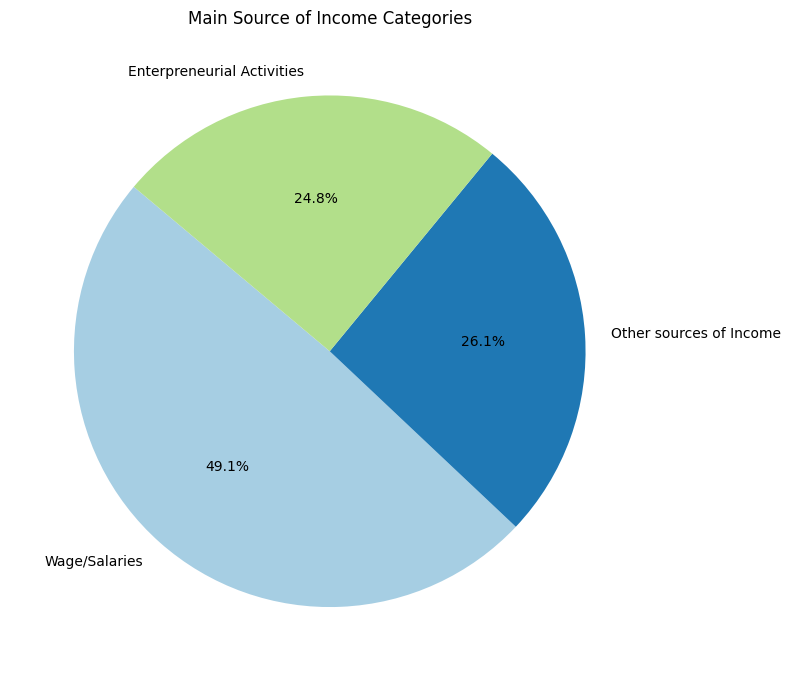

Main Source of Income
Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: count, dtype: int64

In [12]:
income_sources = df['Main Source of Income'].value_counts()

plt.figure(figsize=(8, 8))
income_sources.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Main Source of Income Categories')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

income_sources

<h1>Insight 3 - Most people earn their income from wages or salaries (about 50%), while the rest come from other sources or business activities. This shows that many rely on regular jobs, but a significant number also depend on entrepreneurship and other income types</h1>

<h1>4. Avaerage Expenditure (RICE vs MEAT vs FISH)</h1>

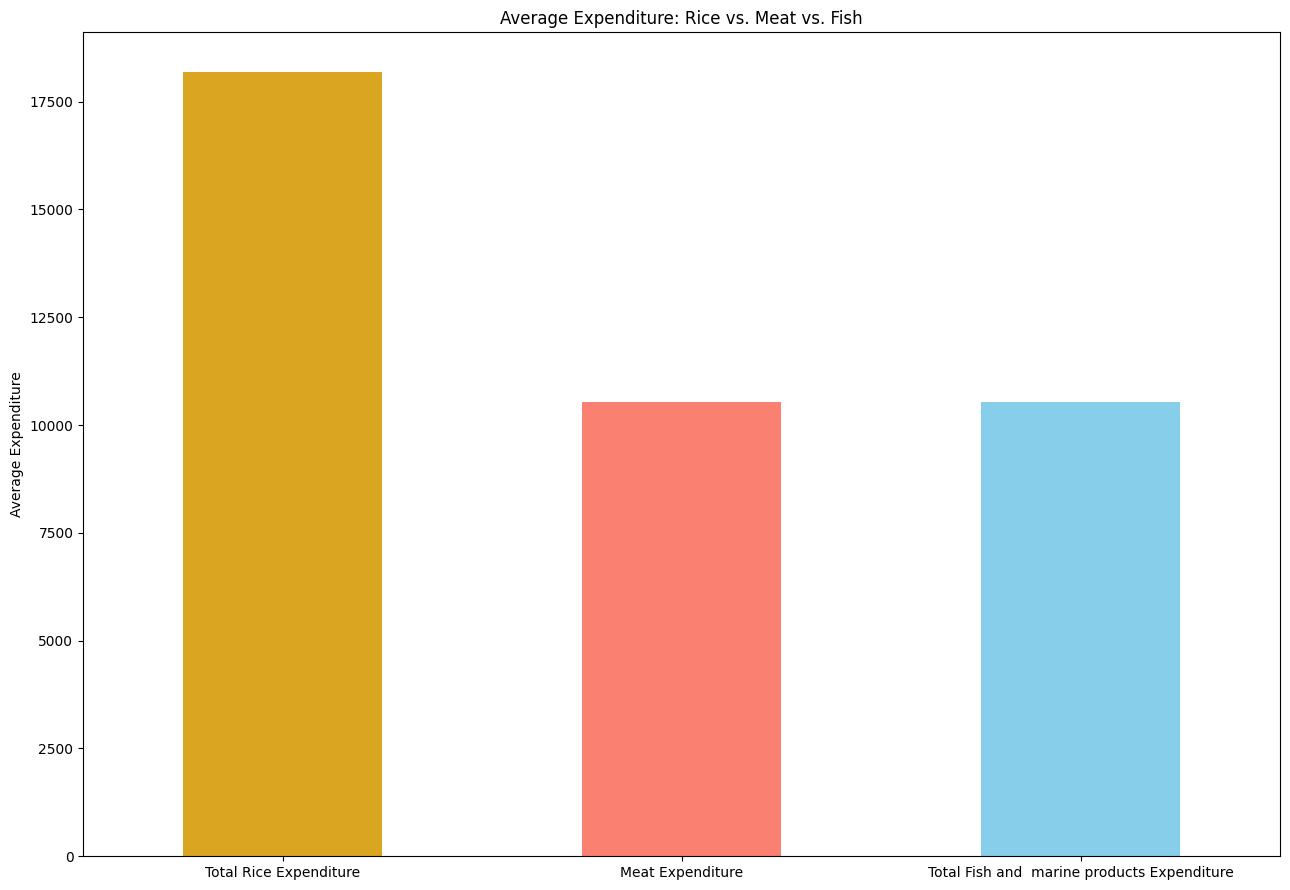

Total Rice Expenditure                         18195.825005
Meat Expenditure                               10540.072574
Total Fish and  marine products Expenditure    10529.318337
dtype: float64

In [13]:
data = df[['Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure']]

avg_exp = data.mean()

plt.figure(figsize=(13, 9))
avg_exp.plot(kind='bar', color=['goldenrod', 'salmon', 'skyblue'])
plt.title('Average Expenditure: Rice vs. Meat vs. Fish')
plt.ylabel('Average Expenditure')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

avg_exp

<h1>Insight 4 - On average, people spend the most on rice, nearly double what they spend on meat or fish. This shows rice is a staple food with the highest share of food expenses, while meat and fish have similar, lower spending levels.</h1>

<h1>5. Average ALCOHOL & TOBACCO Expenditure per Region</h1>

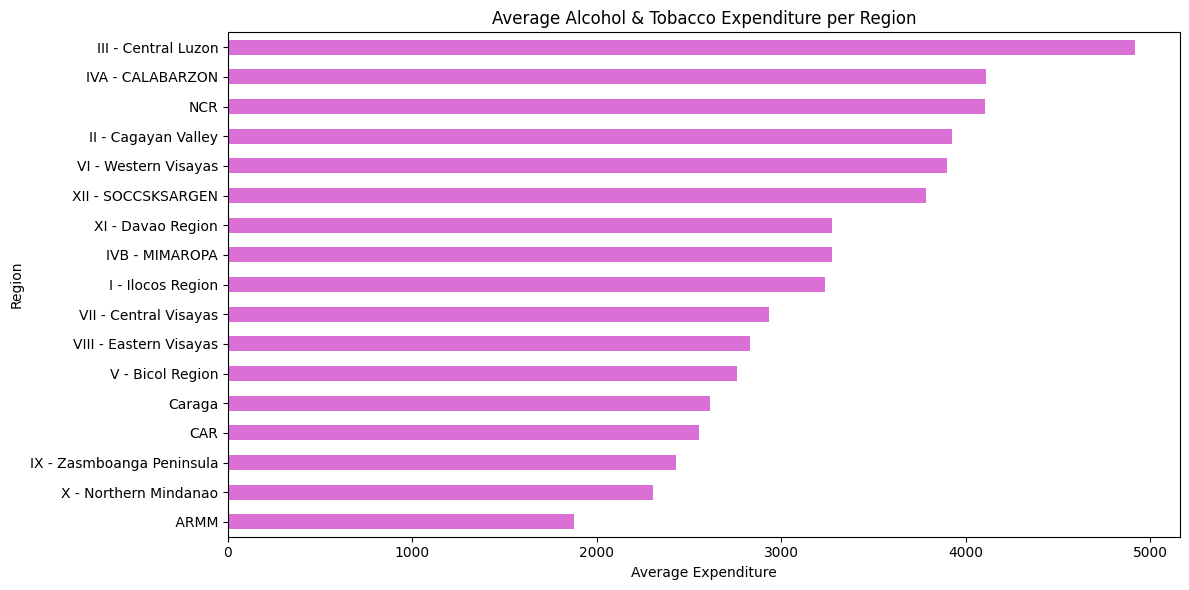

Region
 ARMM                        1877.441726
X - Northern Mindanao        2305.993641
IX - Zasmboanga Peninsula    2429.521812
CAR                          2556.754203
Caraga                       2611.359147
V - Bicol Region             2759.818366
VIII - Eastern Visayas       2828.499358
VII - Central Visayas        2934.774892
I - Ilocos Region            3236.829642
IVB - MIMAROPA               3275.139311
XI - Davao Region            3277.017989
XII - SOCCSKSARGEN           3787.248351
VI - Western Visayas         3897.905998
II - Cagayan Valley          3924.192880
NCR                          4103.560533
IVA - CALABARZON             4112.237866
III - Central Luzon          4916.503244
Name: Alcohol_Tobacco_Expenditure, dtype: float64

In [14]:
df['Alcohol_Tobacco_Expenditure'] = df['Alcoholic Beverages Expenditure'] + df['Tobacco Expenditure']

avg_alc_tob_by_region = df.groupby('Region')['Alcohol_Tobacco_Expenditure'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_alc_tob_by_region.plot(kind='barh', color='orchid')
plt.title('Average Alcohol & Tobacco Expenditure per Region')
plt.xlabel('Average Expenditure')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

avg_alc_tob_by_region 

<h1>Insight 5 -Alcohol and tobacco spending differs by region, with ARMM spending the least and Central Luzon the most. This may reflect differences in income, lifestyle, or availability. Understanding these patterns can help target health programs to areas where alcohol and tobacco use might be higher.</h1>

<h1>Count of Household by HEAD SEX</h1>

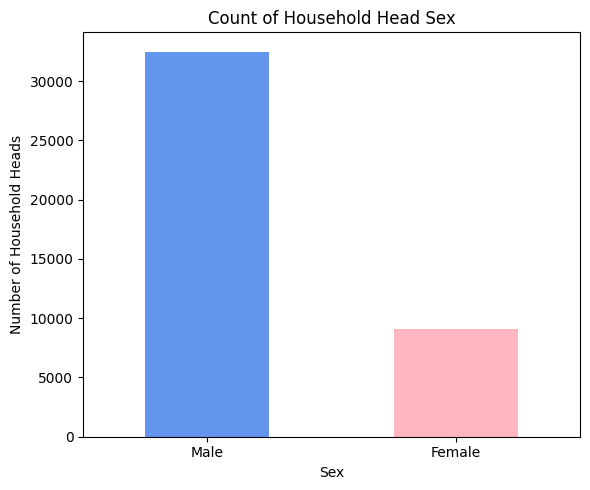

Household Head Sex
Male      32483
Female     9061
Name: count, dtype: int64

In [15]:
sex_counts = df['Household Head Sex'].value_counts()

plt.figure(figsize=(6, 5))
sex_counts.plot(kind='bar', color=['cornflowerblue', 'lightpink'])
plt.title('Count of Household Head Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Household Heads')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
sex_counts

<h1>Insight 6 -Most households are headed by males, with about three times more male heads than female heads. This shows that male-headed households are much more common in the data.

</h1>

<h1>7. AGE DISTRIBUTION OF HOUSEHOLD HEADS</h1>

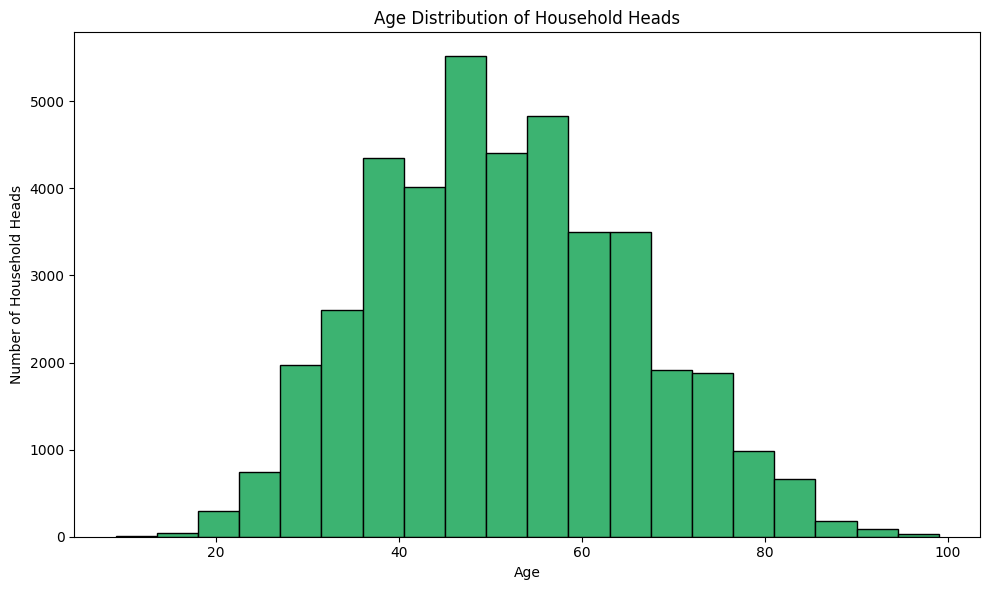

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Household Head Age'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Age Distribution of Household Heads')
plt.xlabel('Age')
plt.ylabel('Number of Household Heads')
plt.tight_layout()
plt.show()

<h1>Insight 7 - Most household heads are between 36 and 54 years old, showing that middle-aged adults are the primary decision-makers in households. Very few household heads are younger than 18 or older than 85.

</h1>

<h1>8. AVERAGE NUMBER OF FAMILY MEMBERS BY REGION</h1>

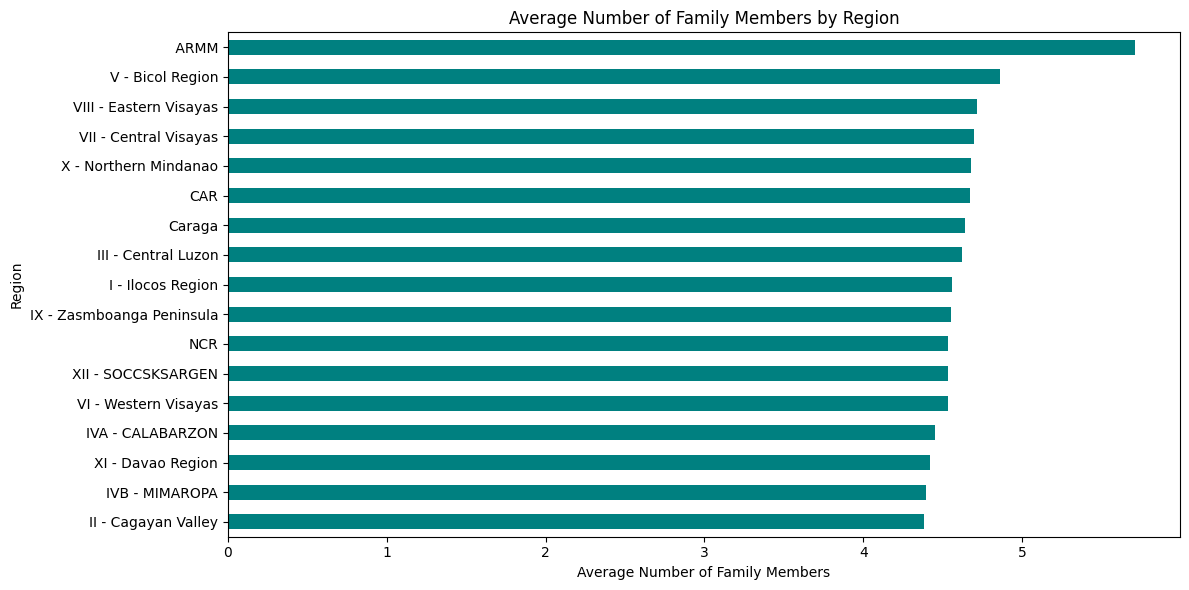

Region
II - Cagayan Valley          4.382154
IVB - MIMAROPA               4.394716
XI - Davao Region            4.418643
IVA - CALABARZON             4.451706
VI - Western Visayas         4.529989
XII - SOCCSKSARGEN           4.532045
NCR                          4.533414
IX - Zasmboanga Peninsula    4.552013
I - Ilocos Region            4.560903
III - Central Luzon          4.619092
Caraga                       4.641414
CAR                          4.668986
X - Northern Mindanao        4.677266
VII - Central Visayas        4.699331
VIII - Eastern Visayas       4.713736
V - Bicol Region             4.862460
 ARMM                        5.708185
Name: Total Number of Family members, dtype: float64

In [17]:
avg_family_size = df.groupby('Region')['Total Number of Family members'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_family_size.plot(kind='barh', color='teal')
plt.title('Average Number of Family Members by Region')
plt.xlabel('Average Number of Family Members')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
avg_family_size

<h1>Insight 8 -Most regions have families with about 4 to 5 members. The ARMM region has bigger families, with almost 6 members on average. This might be due to different traditions or living conditions.

</h1>

<h1>9. Top 10 Occupations of Household Heads</h1>

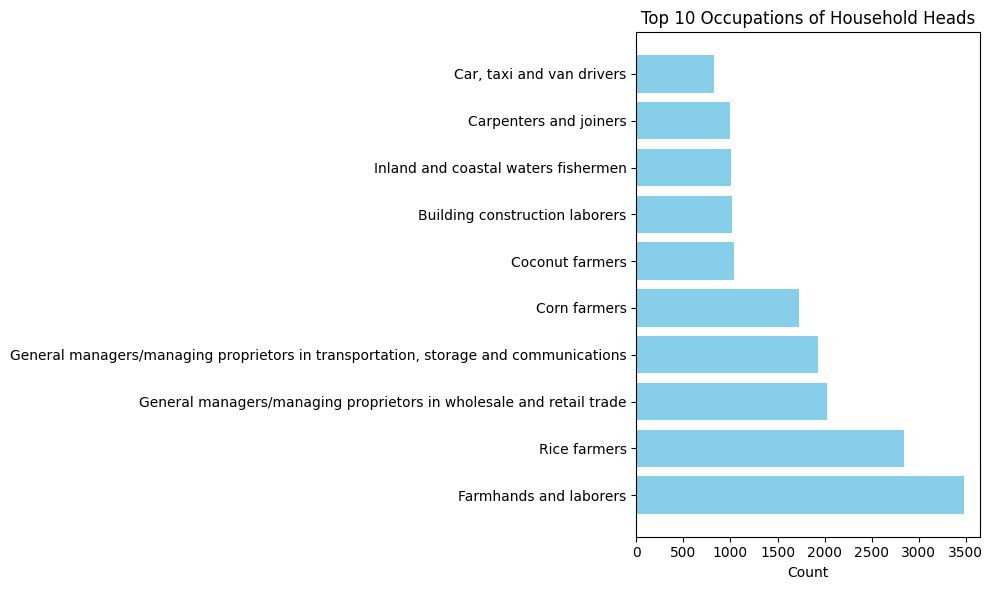

Household Head Occupation
Farmhands and laborers                                                                 3478
Rice farmers                                                                           2849
General managers/managing proprietors in wholesale and retail trade                    2028
General managers/managing proprietors in transportation, storage and communications    1932
Corn farmers                                                                           1724
Coconut farmers                                                                        1036
Building construction laborers                                                         1014
Inland and coastal waters fishermen                                                    1011
Carpenters and joiners                                                                 1000
Car, taxi and van drivers                                                               824
Name: count, dtype: int64

In [18]:
top_occupations = df['Household Head Occupation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_occupations.index, top_occupations.values, color='skyblue')
plt.title('Top 10 Occupations of Household Heads')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

top_occupations

<h1>insight 9 - Most household heads work as farmhands, rice farmers, or managers in trade and transportation. Farming-related jobs make up a large part of the list, showing agriculture is a main source of income for many households.</h1>

<h1>10. Count of Toilet Facilities by Region</h1>

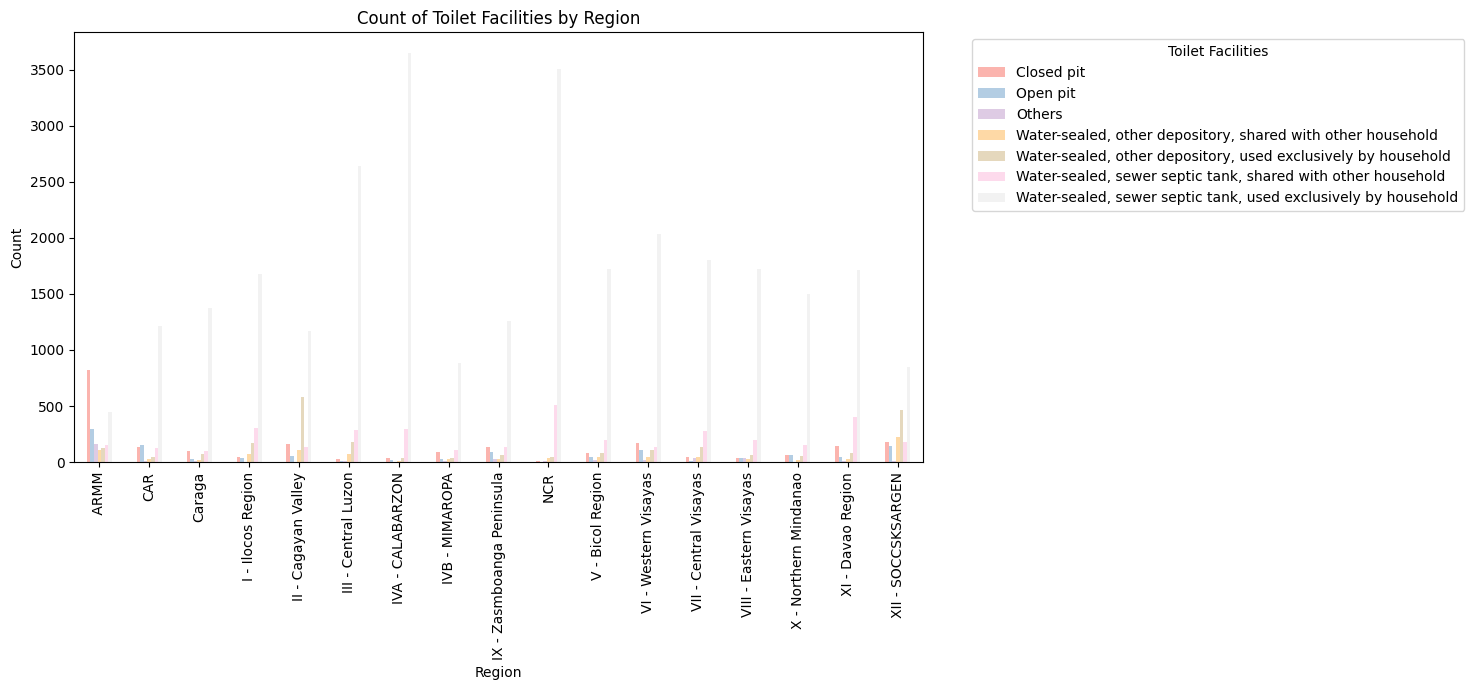

Toilet Facilities,Closed pit,Open pit,Others,"Water-sealed, other depository, shared with other household","Water-sealed, other depository, used exclusively by household","Water-sealed, sewer septic tank, shared with other household","Water-sealed, sewer septic tank, used exclusively by household"
Region,,,,,,,
ARMM,818,298,160,105,126,153,444
CAR,132,149,7,24,47,129,1216
Caraga,101,32,8,22,75,99,1371
I - Ilocos Region,47,40,0,71,174,300,1681
II - Cagayan Valley,157,53,1,112,584,134,1173
III - Central Luzon,29,12,6,71,180,284,2638
IVA - CALABARZON,40,17,0,11,36,296,3650
IVB - MIMAROPA,87,28,6,28,33,105,886
IX - Zasmboanga Peninsula,133,94,27,25,66,138,1262


In [19]:
toilet_counts = df.groupby(['Region', 'Toilet Facilities']).size().unstack(fill_value=0)

toilet_counts.plot(kind='bar', figsize=(15, 7), colormap='Pastel1')
plt.title('Count of Toilet Facilities by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Toilet Facilities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

toilet_counts

<h1>Insight 10 - Most regions have a high number of households using water-sealed toilets connected to sewer or septic tanks, especially those used exclusively by the household. However, regions like ARMM and Caraga still have many households using pit toilets or shared facilities, indicating room for improving sanitation access.</h1>

<h1>11. Average Total Food Expenditure by Region and Main Source of Income</h1>

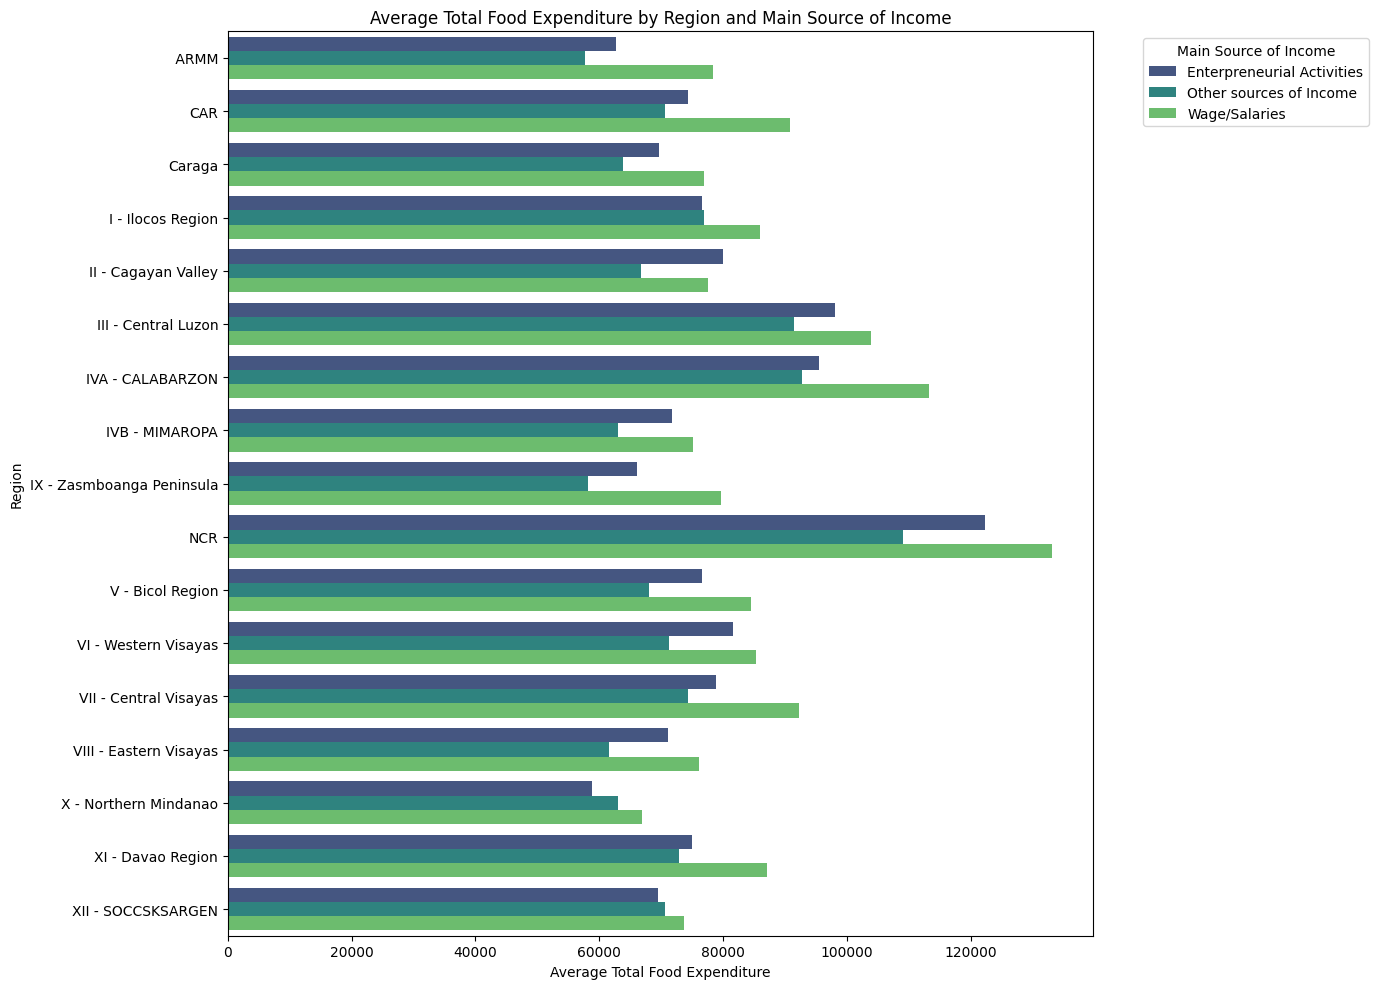

In [22]:
avg_food_expenditure = df.groupby(['Region', 'Main Source of Income'])['Total Food Expenditure'].mean().unstack()

avg_food_expenditure_reset = avg_food_expenditure.reset_index()
melted_df = avg_food_expenditure_reset.melt(id_vars='Region', 
                                             var_name='Main Source of Income', 
                                             value_name='Average Food Expenditure')
plt.figure(figsize=(14, 10))
sns.barplot(data=melted_df, 
            x='Average Food Expenditure', 
            y='Region', 
            hue='Main Source of Income', 
            palette='viridis')

plt.title('Average Total Food Expenditure by Region and Main Source of Income')
plt.xlabel('Average Total Food Expenditure')
plt.ylabel('Region')
plt.legend(title='Main Source of Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insights 11: The data shows that the National Capital Region (NCR) has the highest average total food expenditure, particularly among households earning through wage or salary-based income, while Region X - Northern Mindanao records the lowest, especially among those relying on entrepreneurial activities, showing the difference in food spending between people in cities and those in the countryside based on how they earn their money.</h1>

<h1>12. Region, Job or Business Indicator</h1>

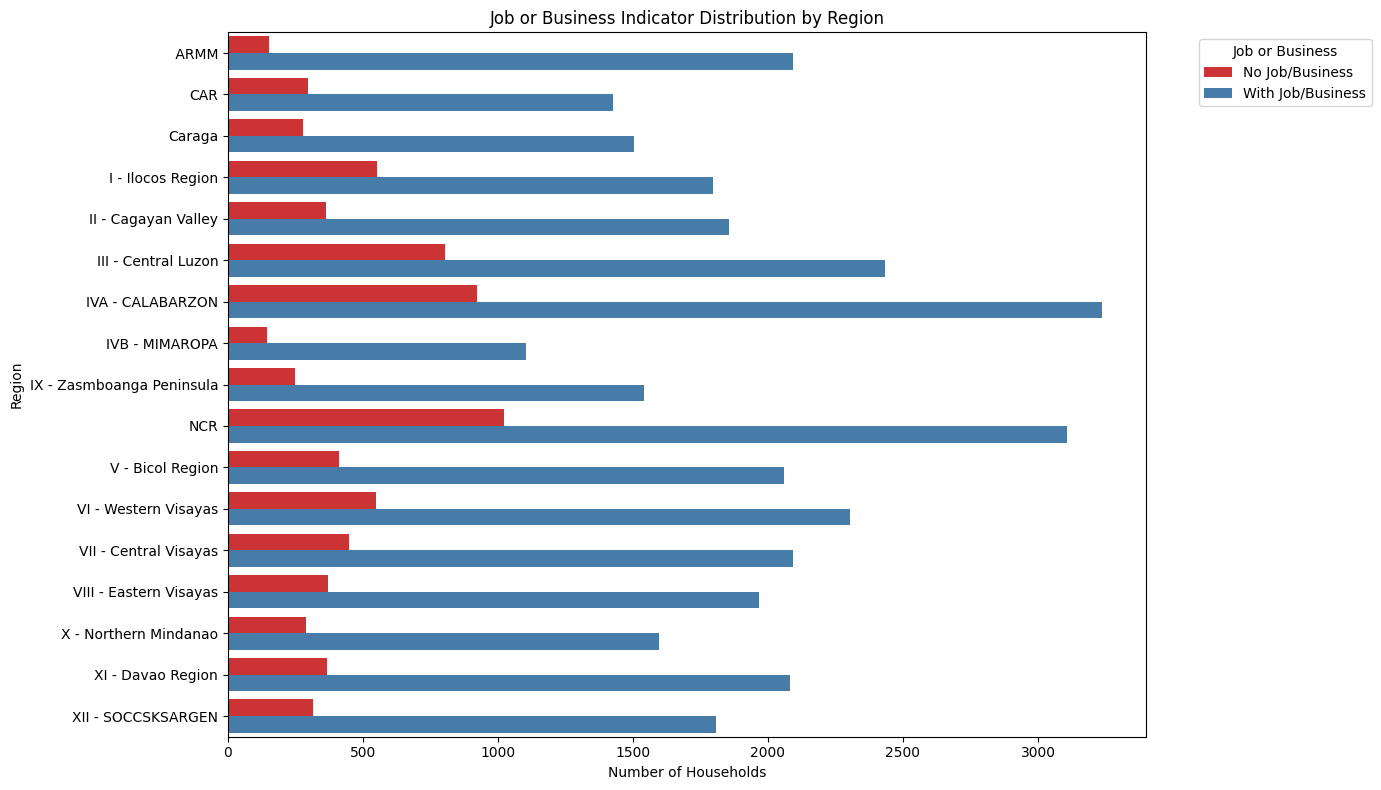

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, 
              y='Region', 
              hue='Household Head Job or Business Indicator',
              palette='Set1')
plt.title('Job or Business Indicator Distribution by Region')
plt.xlabel('Number of Households')
plt.ylabel('Region')
plt.legend(title='Job or Business', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>Insights 12: Among all the regions, CALABARZON (Region IV-A) has the highest number of household heads who have a job or run a business, particularly those earning through wage or salary-based income. Where in MIMAROPA and ARMM have the lowest number of household heads without a job or business.</h1>

<h1>13. Total Household Income categorized according to the Class of Worker.</h1>

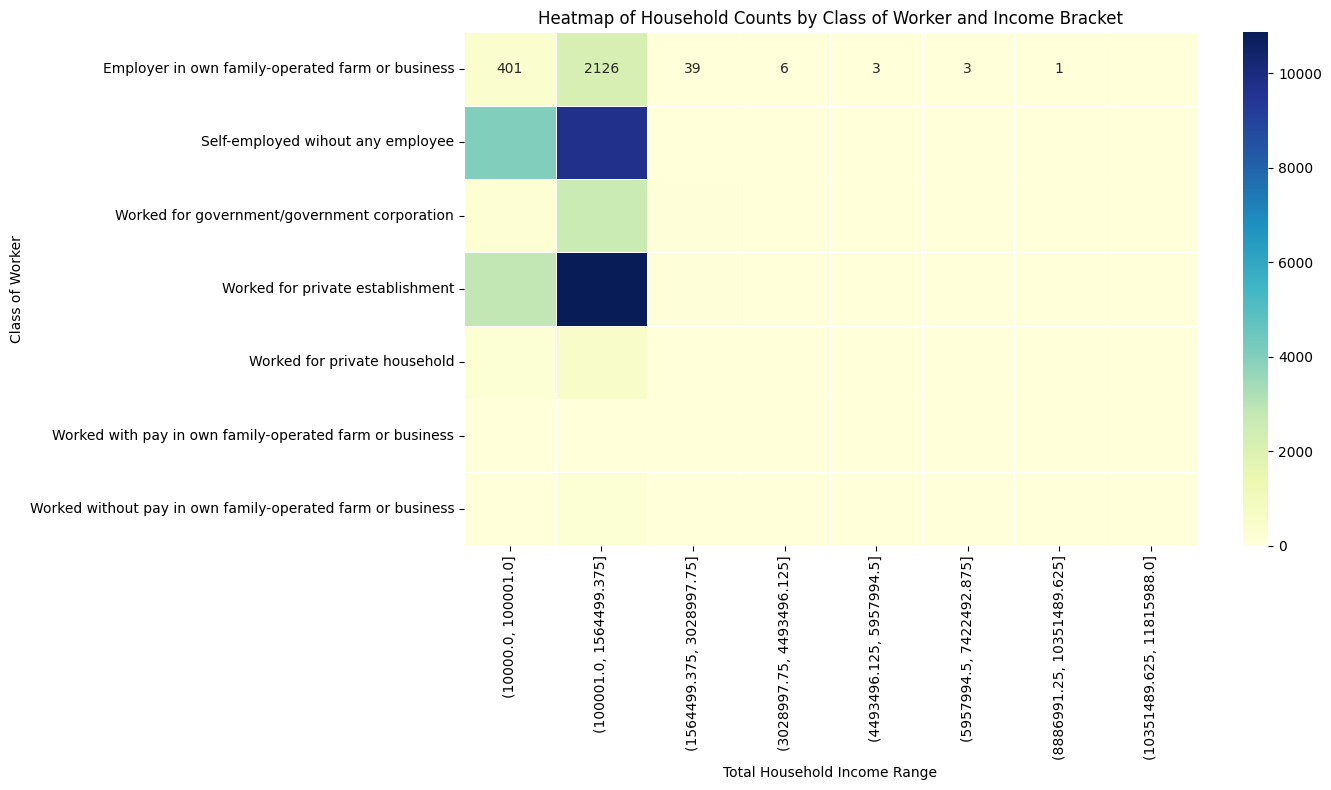

In [35]:
import numpy as np

max_income = df['Total Household Income'].max()

bins = np.concatenate(([0, 10000], np.linspace(100001, max_income, 9)))

income_bins = pd.cut(df['Total Household Income'], bins=bins, include_lowest=True)

pivot_table = pd.crosstab(df['Household Head Class of Worker'], income_bins)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')

plt.title('Heatmap of Household Counts by Class of Worker and Income Bracket')
plt.xlabel('Total Household Income Range')
plt.ylabel('Class of Worker')

plt.tight_layout()
plt.show()

<h1>Insight 13: Most household counts by class of worker and total household income range show where household heads usually fall based on their type of work. Most households are in the lowest income group, especially those where the household head is self-employed without any employees or works for a private establishment.</h1>

<h1>14. The data includes Age, Head of Household's Sex, and Marital Status </h1>

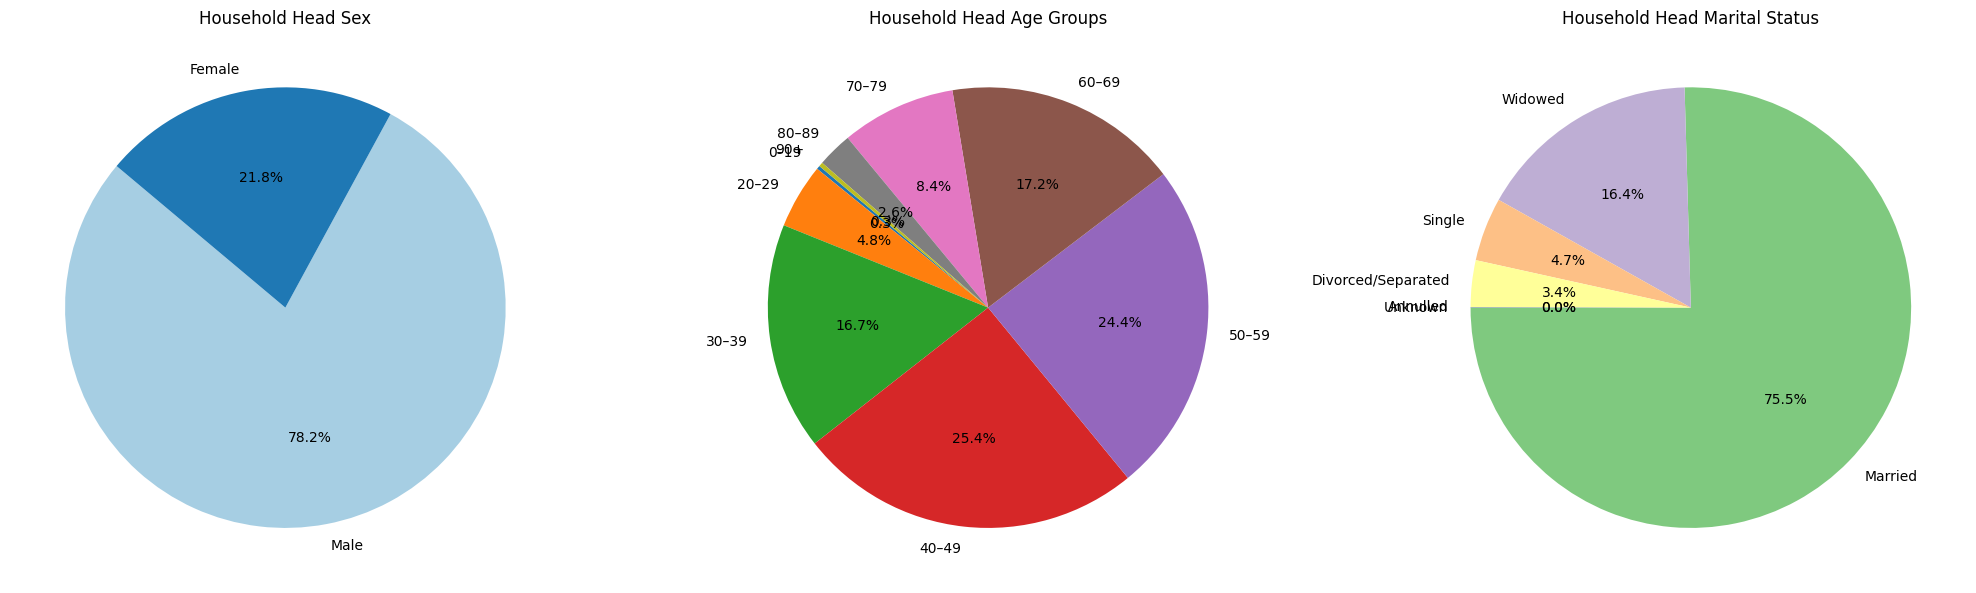

In [36]:
sex_counts = df['Household Head Sex'].value_counts()
marital_status_counts = df['Household Head Marital Status'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Household Head Sex')

bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['0–19', '20–29', '30–39', '40–49', '50–59', '60–69', '70–79', '80–89', '90+']

df['Age Group'] = pd.cut(df['Household Head Age'], bins=bins, labels=labels, right=True)

age_group_counts = df['Age Group'].value_counts().sort_index()

axes[1].pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Household Head Age Groups')

#Marital Status
axes[2].pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Accent.colors)
axes[2].set_title('Household Head Marital Status')

plt.tight_layout()
plt.show()

<H1>Insight 14: The data shows that household heads are predominantly male, typically between 40 and 49 years old, and most are married.</H1>

<h1> 15. Type of Household, Total Number of Family Members, and Total Number of Family Members Employed</h1>

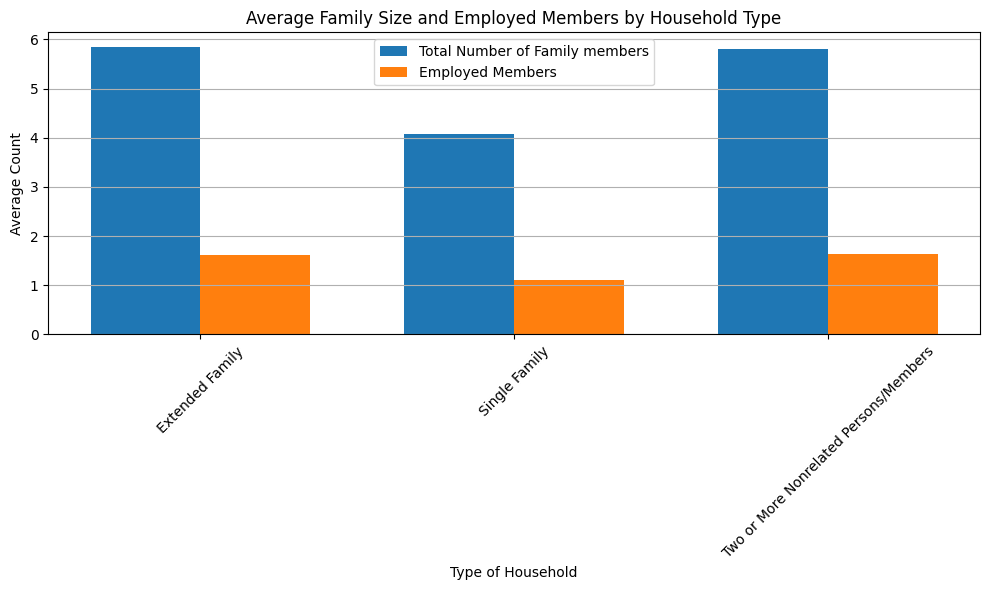

In [37]:
grouped = df.groupby('Type of Household')[['Total Number of Family members', 'Total number of family members employed']].mean().reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(grouped))

plt.bar(x, grouped['Total Number of Family members'], width=bar_width, label='Total Number of Family members')
plt.bar([p + bar_width for p in x], grouped['Total number of family members employed'], width=bar_width, label='Employed Members')

plt.xlabel('Type of Household')
plt.ylabel('Average Count')
plt.title('Average Family Size and Employed Members by Household Type')
plt.xticks([p + bar_width / 2 for p in x], grouped['Type of Household'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<H1>Insight 15: The data indicates a significant difference in average family size between employed and unemployed households, where average household family 1 to 2 family members are employed, while households with average of 5 to 6 members are often unemployed.</H1>

<h1>16.Type of Building or House and Corresponding Floor Area

        BuildingType     FloorArea      HouseAge
count          41544  41544.000000  41544.000000
unique             6           NaN           NaN
top     Single house           NaN           NaN
freq           39069           NaN           NaN
mean             NaN     55.603360     20.125505
std              NaN     55.023165     14.295452
min              NaN      5.000000      0.000000
25%              NaN     25.000000     10.000000
50%              NaN     40.000000     17.000000
75%              NaN     70.000000     26.000000
max              NaN    998.000000    200.000000


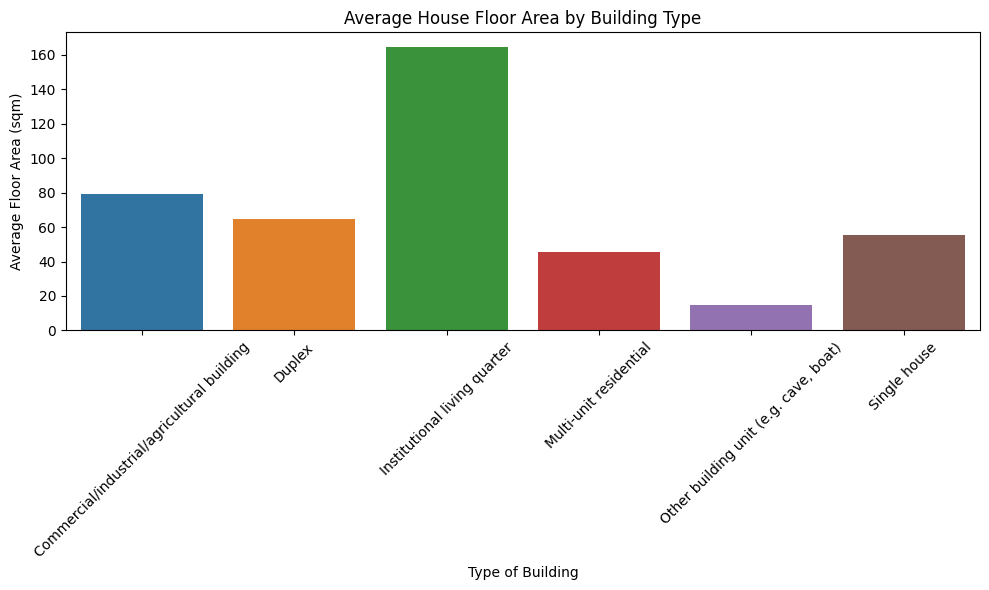

In [43]:
df.rename(columns={
    "Type of Building/House": "BuildingType",
    "House Floor Area": "FloorArea",
    "House Age": "HouseAge"
}, inplace=True)

df_clean = df.dropna(subset=["BuildingType", "FloorArea", "HouseAge"])

print(df_clean[["BuildingType", "FloorArea", "HouseAge"]].describe(include='all'))

plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x="BuildingType", y="FloorArea", estimator='mean', ci=None)
plt.xticks(rotation=45)
plt.title("Average House Floor Area by Building Type")
plt.xlabel("Type of Building")
plt.ylabel("Average Floor Area (sqm)")
plt.tight_layout()
plt.show()


<H1>Insight 16: The graphs show that Institutional Living Quarters have the highest average floor area at 160 sqm. Other types such as commercial/industrial/agricultural buildings, duplexes, multi-unit residential units, and single houses range from 40 to 80 sqm, while other building units have an average of only 20 sqm.</H1>

<h1>17. House Age, Floor Area, and Building Type</h1>

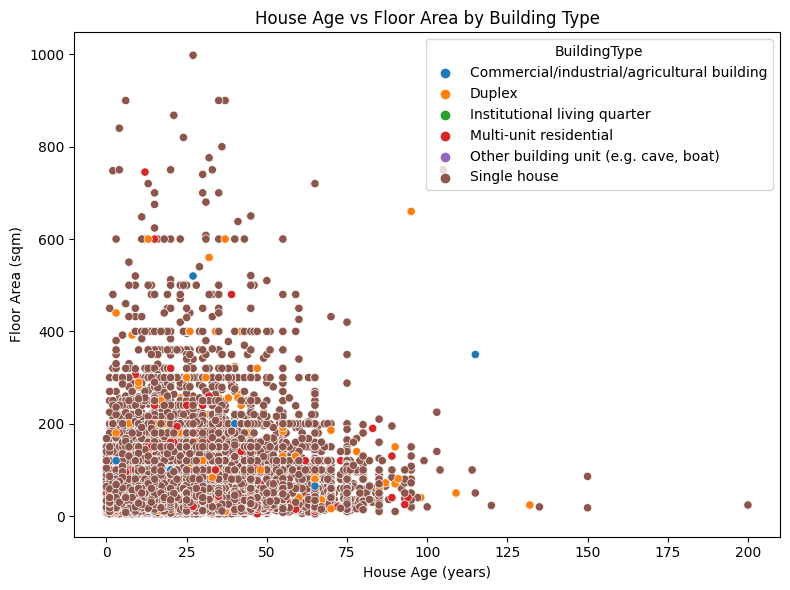

In [44]:
#House Age vs Floor Area
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="HouseAge", y="FloorArea", hue="BuildingType")
plt.title("House Age vs Floor Area by Building Type")
plt.xlabel("House Age (years)")
plt.ylabel("Floor Area (sqm)")
plt.tight_layout()
plt.show()

<h1> Insight 17: The graph shows that most structures are single houses, with floor areas widely spread up to 1000 sqm. Institutional living quarters and commercial/industrial/agricultural buildings appear less frequently but tend to have larger floor areas. Newer buildings (less than 50 years old) dominate the dataset, and buildings older than 100 years are rare and typically have smaller floor areas.</h1>

<h1>18. Tenure Status and Main Source of Water Supply</h1>

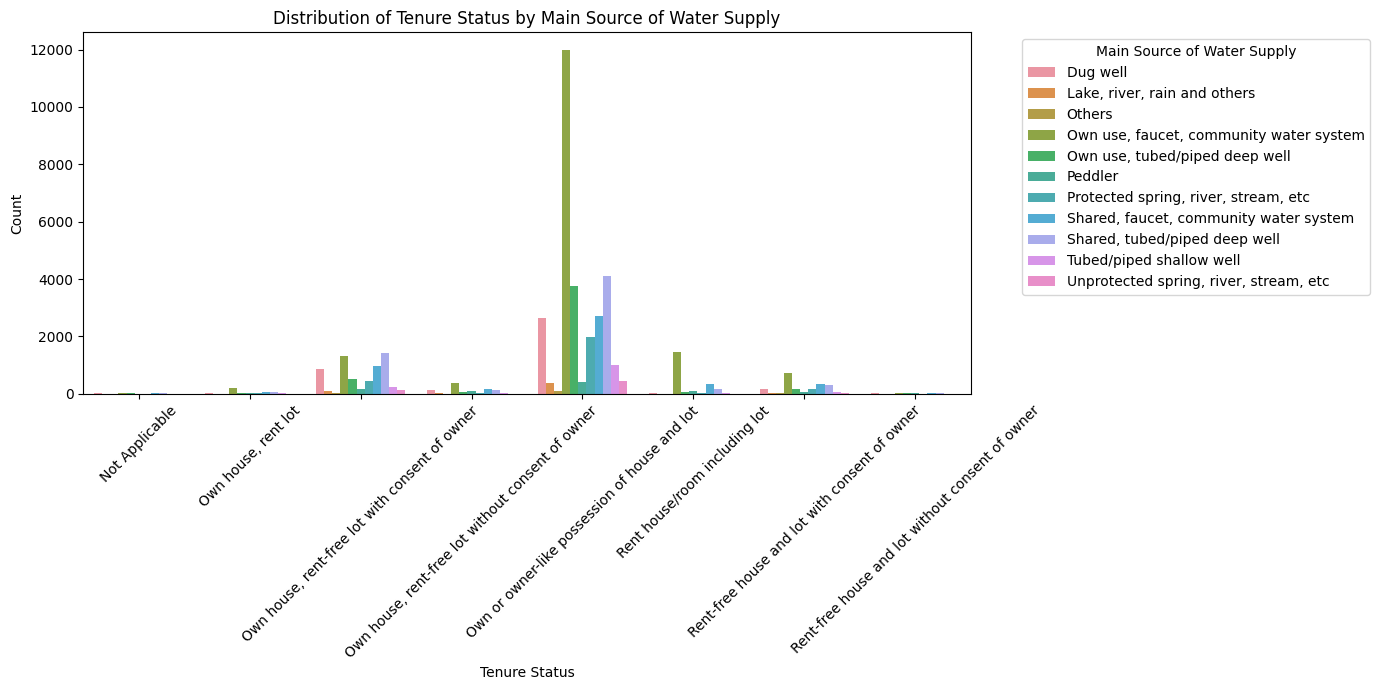

In [39]:
df_clean = df[['Tenure Status', 'Main Source of Water Supply']].dropna()

grouped = df_clean.groupby(['Tenure Status', 'Main Source of Water Supply']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped,
    x='Tenure Status',
    y='Count',
    hue='Main Source of Water Supply'
)

plt.title('Distribution of Tenure Status by Main Source of Water Supply')
plt.xlabel('Tenure Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Main Source of Water Supply', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h1>Insight 18:Most household heads who own a house and live on a rent-free lot without the consent of the owner use their own faucet or a community water system</h1>

<h1>19. Correlation between Imputed House Rental Value and Total Income from Entrepreneurial Activities</h1>

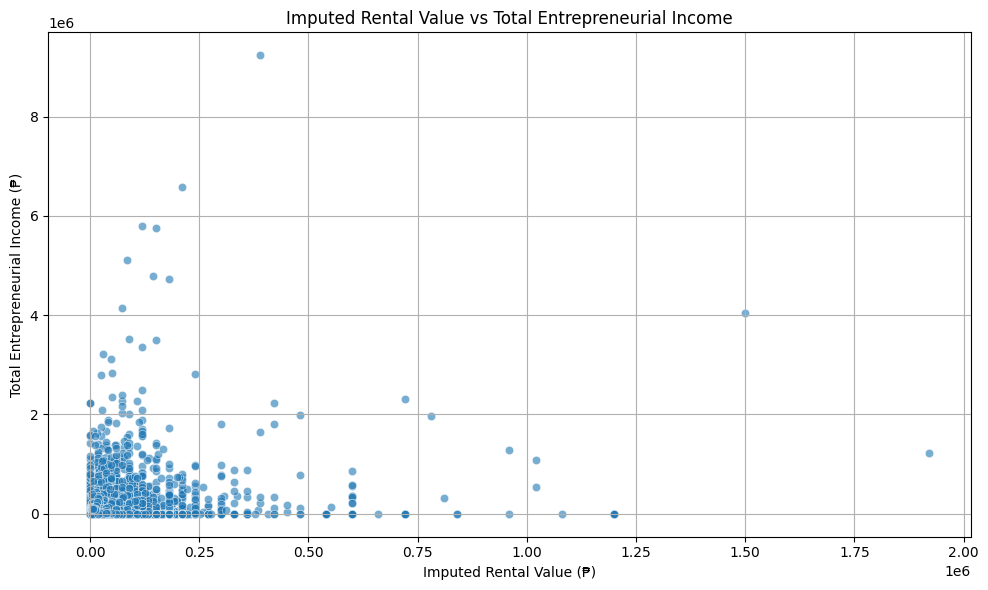

In [40]:
df_clean = df[['Imputed House Rental Value', 'Total Income from Entrepreneurial Acitivites']].dropna()

df_clean.columns = ['RentalValue', 'EntrepreneurIncome']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='RentalValue',
    y='EntrepreneurIncome',
    alpha=0.6
)

plt.title('Imputed Rental Value vs Total Entrepreneurial Income')
plt.xlabel('Imputed Rental Value (₱)')
plt.ylabel('Total Entrepreneurial Income (₱)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
correlation = df_clean['RentalValue'].corr(df_clean['EntrepreneurIncome'])
print(f"Correlation coefficient: {correlation:.4f}")

Correlation coefficient: 0.2148


<h1>Insight 19: The graph shows that most households have low rental values and entrepreneurial incomes, with little correlation between the two. A few outliers earn very high entrepreneurial income, regardless of housing value.

<h1> 20. Average Number of Television, Washing Machine, Refrigerator/Freezer, and Airconditioner per Household</h1>

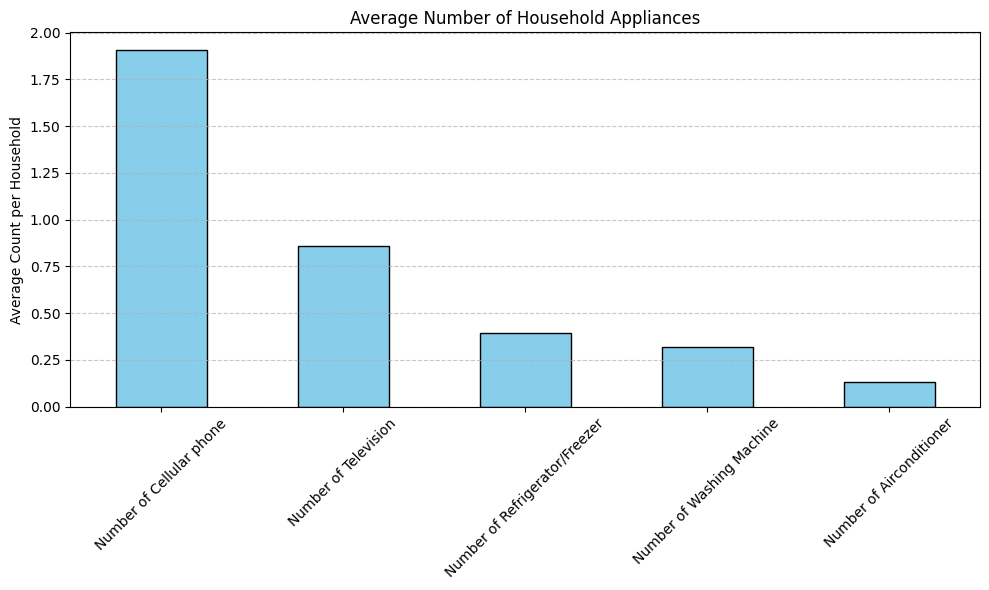

In [46]:
appliance_columns = [
    'Number of Television',
    'Number of Washing Machine',
    'Number of Refrigerator/Freezer',
    'Number of Airconditioner',
    'Number of Cellular phone'
]

average_appliances = df[appliance_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_appliances.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Number of Household Appliances')
plt.ylabel('Average Count per Household')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Insight 20: Among household appliances, Cellular phone are the most commonly owned.
The graph shows that households, on average, own fewer units of Televison, washing machines, refrigerators/freezers, and especially air conditioners, which appear to be the least common. </h1>